<a href="https://colab.research.google.com/github/Swapnil-tripathi/Netflix-Stockprice-Prediction/blob/main/Netflix_Stock_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 ***Netflix Stock Price Prediction ⏩***

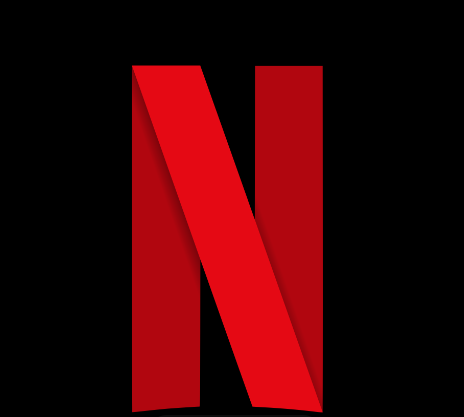

**Introduction**



*   Stock price represents the current market value of a publicly traded company's shares.
*   Stock prices are determined by supply and demand in the stock market and fluctuate due to various factors.
* Stock prices play a vital role in investment decisions,with investors using strategies like fundamental analysis and technical analysis to evaluate them.
* These prices are often grouped in stock market indices,providing a broader view of market performance.
* Understanding these prices is crucial for effective investment decision-making.
* I will use LSTM Machine algorithm in this task to facilitate stock price prediction,making it more accessible for investors to make informed decisions.



**Data Description**



*   I have considered dataset of Netflix Stock Price.
*   This dataset contains data for 5 years i.e. from 5th Feb 2018 to 5th Feb 2022.
* This dataset contains 1009 records having 7 features i.e. Date,Open,High,Low,Close,Adj Close and Volume.



**Information regarding 7 features**



*   Date : The Date of stock price.
*   Open : The Price at which a stock started trading.
*   Low  : Lowest price of stock on that period.
*   Close : The price at which a stock  close trading.
*  Adj Close : Adjusted close price of a stock.
*  Volume   : Total amount of trading activity.



**Importing important libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
import tensorflow
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import LSTM
from keras.layers import Dropout


In [ ]:
import warnings
warnings.filterwarnings('ignore')#Suppress all warnings.

**Loading the Dataset**

In [ ]:
stock_price=pd.read_csv('/content/NFLX.csv')

In [ ]:
stock_price#It has 1009 rows and 7 columns

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900
...,...,...,...,...,...,...,...
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015,427.140015,20047500
1005,2022-02-01,432.959991,458.480011,425.540009,457.130005,457.130005,22542300
1006,2022-02-02,448.250000,451.980011,426.480011,429.480011,429.480011,14346000
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006,405.600006,9905200


In [ ]:
stock_price.info()# info function gives information about all the columns i.e. their column name,count and data type.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1009 non-null   object 
 1   Open       1009 non-null   float64
 2   High       1009 non-null   float64
 3   Low        1009 non-null   float64
 4   Close      1009 non-null   float64
 5   Adj Close  1009 non-null   float64
 6   Volume     1009 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 55.3+ KB


In [ ]:
#Dropping date column
stock_price.drop('Date',axis=1,inplace=True)

In [ ]:
stock_price

,Open,High,Low,Close,Adj Close,Volume
0,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,253.850006,255.800003,236.110001,249.470001,249.470001,16906900
...,...,...,...,...,...,...
1004,401.970001,427.700012,398.200012,427.140015,427.140015,20047500
1005,432.959991,458.480011,425.540009,457.130005,457.130005,22542300
1006,448.250000,451.980011,426.480011,429.480011,429.480011,14346000
1007,421.440002,429.260010,404.279999,405.600006,405.600006,9905200


In [ ]:
stock_price.info()#Information about stock price dataframe after removing the Date column.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1009 non-null   float64
 1   High       1009 non-null   float64
 2   Low        1009 non-null   float64
 3   Close      1009 non-null   float64
 4   Adj Close  1009 non-null   float64
 5   Volume     1009 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 47.4 KB


In [ ]:
stock_price.shape#Shape function defines number of rows and column in a dataframe.

(1009, 6)

In [ ]:
stock_price.describe()#Describe function gives statistical summary

,Open,High,Low,Close,Adj Close,Volume
count,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1.009000e+03
mean,419.059673,425.320703,412.374044,419.000733,419.000733,7.570685e+06
std,108.537532,109.262960,107.555867,108.289999,108.289999,5.465535e+06
min,233.919998,250.649994,231.229996,233.880005,233.880005,1.144000e+06
25%,331.489990,336.299988,326.000000,331.619995,331.619995,4.091900e+06
50%,377.769989,383.010010,370.880005,378.670013,378.670013,5.934500e+06
75%,509.130005,515.630005,502.529999,509.079987,509.079987,9.322400e+06
max,692.349976,700.989990,686.090027,691.690002,691.690002,5.890430e+07


In [ ]:
stock_price.corr()#Correaltion matrix

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.998605,0.998508,0.996812,0.996812,-0.415838
High,0.998605,1.000000,0.998203,0.998551,0.998551,-0.400699
Low,0.998508,0.998203,1.000000,0.998544,0.998544,-0.432116
Close,0.996812,0.998551,0.998544,1.000000,1.000000,-0.413362
Adj Close,0.996812,0.998551,0.998544,1.000000,1.000000,-0.413362
Volume,-0.415838,-0.400699,-0.432116,-0.413362,-0.413362,1.000000


In [ ]:
stock_price.duplicated()#Checking duplicates in the dataframe.True indicates that there is duplicate value and false indicates no duplicates in the dataframe.

0       False
1       False
2       False
3       False
4       False
        ...  
1004    False
1005    False
1006    False
1007    False
1008    False
Length: 1009, dtype: bool

In [ ]:
stock_price.duplicated().sum()#Sums up all the duplicate values present in the dataframe
#Sum is 0 that means there is no duplicate values present in the dataframe.

0

In [ ]:
stock_price.isnull().sum()#Sums up all the null values present in the dataframe.

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [ ]:
stock_price.nunique()#Gives unique values in each column.

Open          976
High          983
Low           989
Close         988
Adj Close     988
Volume       1005
dtype: int64

**Data Visualization**

Using Heatmap for Data Visualization

Heatmap is a graphical representation used in data visualization to display data values in a two-dimensional matrix format, where each value is represented by a color.

In [ ]:
correlation_matrix=stock_price.corr()
correlation_matrix

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.998605,0.998508,0.996812,0.996812,-0.415838
High,0.998605,1.000000,0.998203,0.998551,0.998551,-0.400699
Low,0.998508,0.998203,1.000000,0.998544,0.998544,-0.432116
Close,0.996812,0.998551,0.998544,1.000000,1.000000,-0.413362
Adj Close,0.996812,0.998551,0.998544,1.000000,1.000000,-0.413362
Volume,-0.415838,-0.400699,-0.432116,-0.413362,-0.413362,1.000000


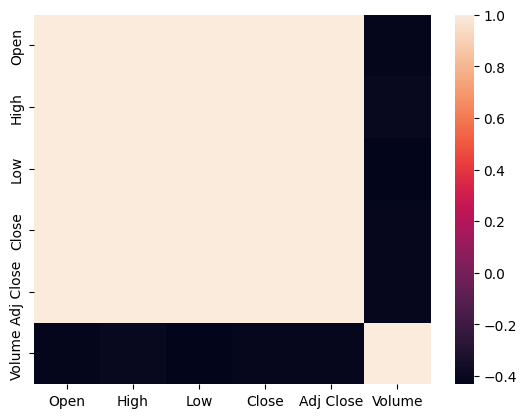

In [ ]:
sns.heatmap(correlation_matrix)
plt.show()

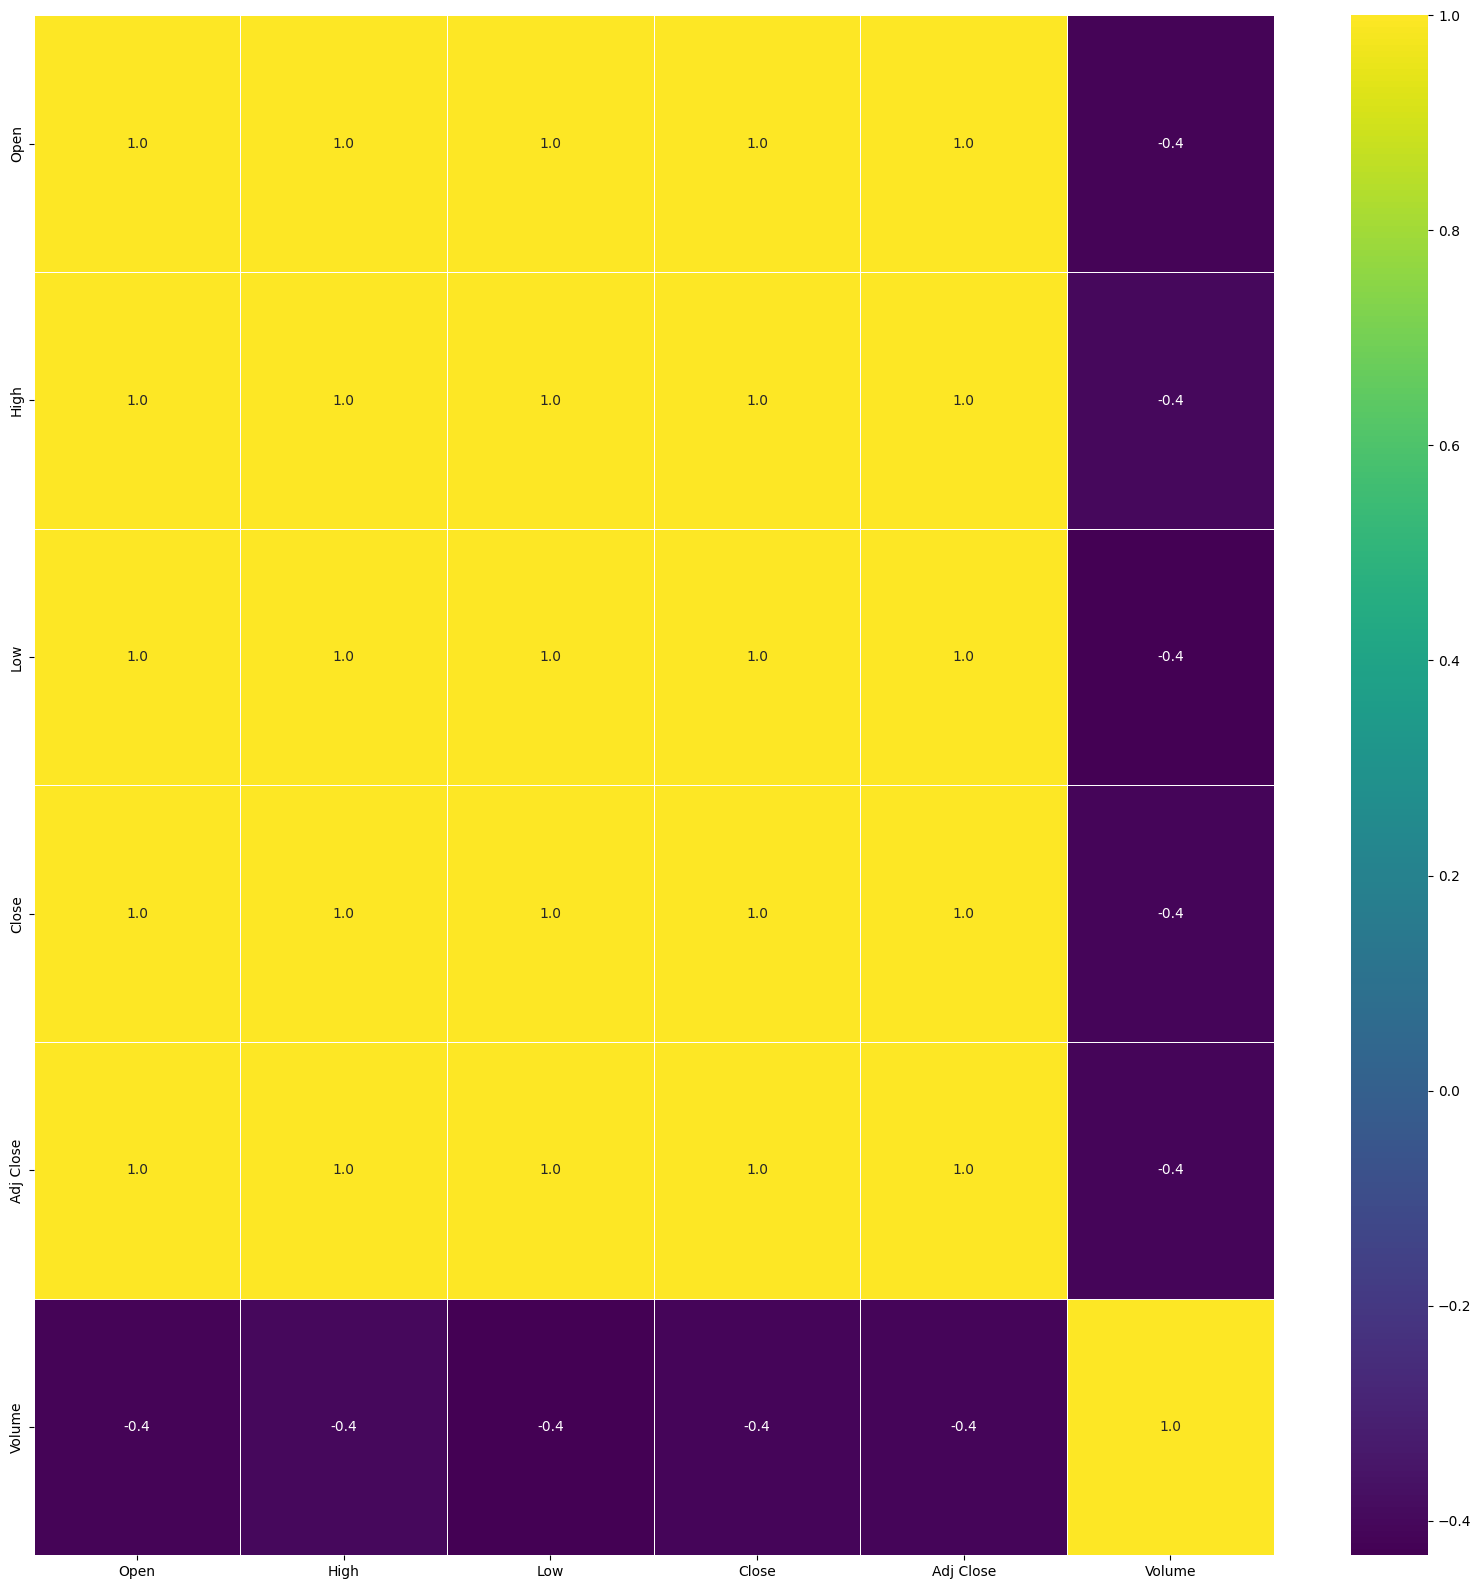

In [ ]:
f,ax=plt.subplots(figsize=(20,20))
sns.heatmap(correlation_matrix,annot=True,linewidths=0.5,fmt='0.1f',ax=ax,cmap='viridis')#plotting correlation matrix when annotate the heat map cells with their corresponding values.
plt.show()

In [ ]:
df=stock_price.copy()
df

,Open,High,Low,Close,Adj Close,Volume
0,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,253.850006,255.800003,236.110001,249.470001,249.470001,16906900
...,...,...,...,...,...,...
1004,401.970001,427.700012,398.200012,427.140015,427.140015,20047500
1005,432.959991,458.480011,425.540009,457.130005,457.130005,22542300
1006,448.250000,451.980011,426.480011,429.480011,429.480011,14346000
1007,421.440002,429.260010,404.279999,405.600006,405.600006,9905200


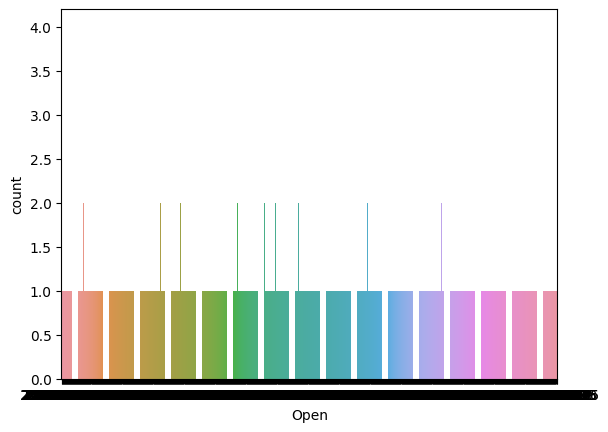

<Figure size 2000x2000 with 0 Axes>

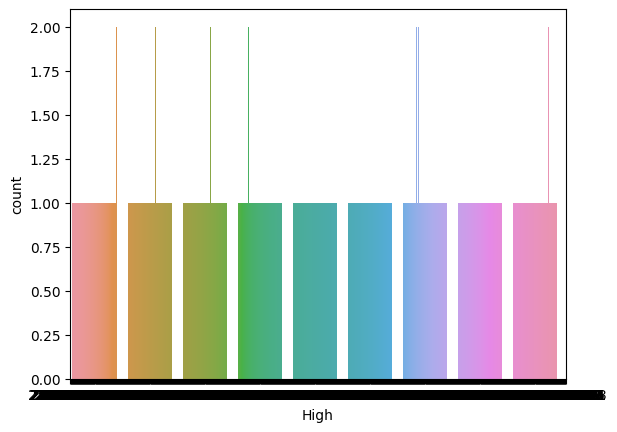

<Figure size 2000x2000 with 0 Axes>

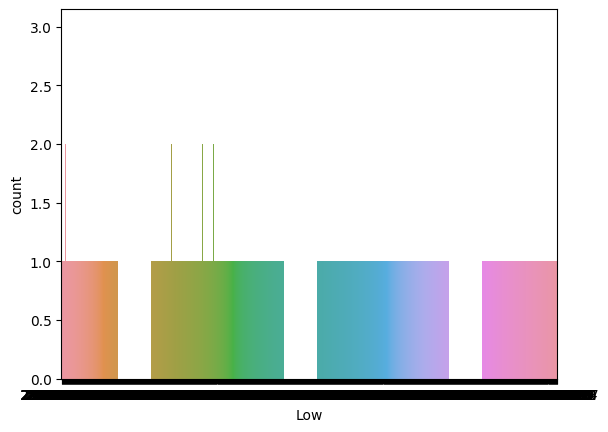

<Figure size 2000x2000 with 0 Axes>

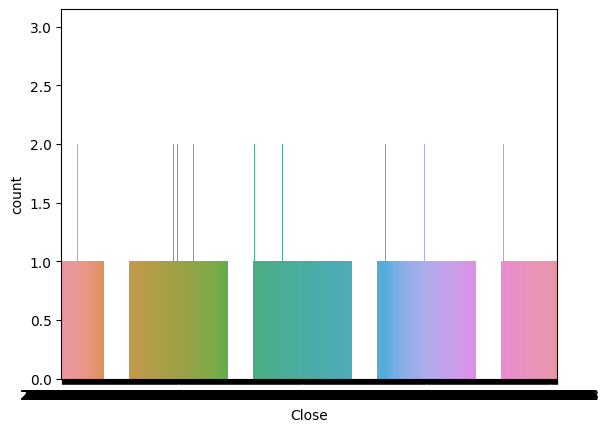

<Figure size 2000x2000 with 0 Axes>

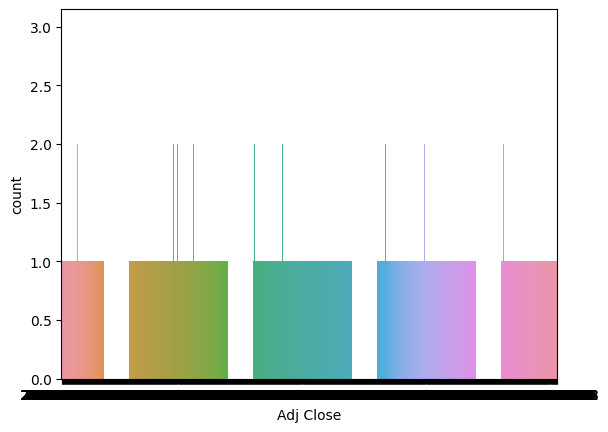

<Figure size 2000x2000 with 0 Axes>

In [ ]:
for i in df.loc[:, ~df.columns.isin(["Date", "Volume"])]:
    f = sns.countplot(x=df[i]);
    plt.figure(figsize=(20,20))
    plt.show()

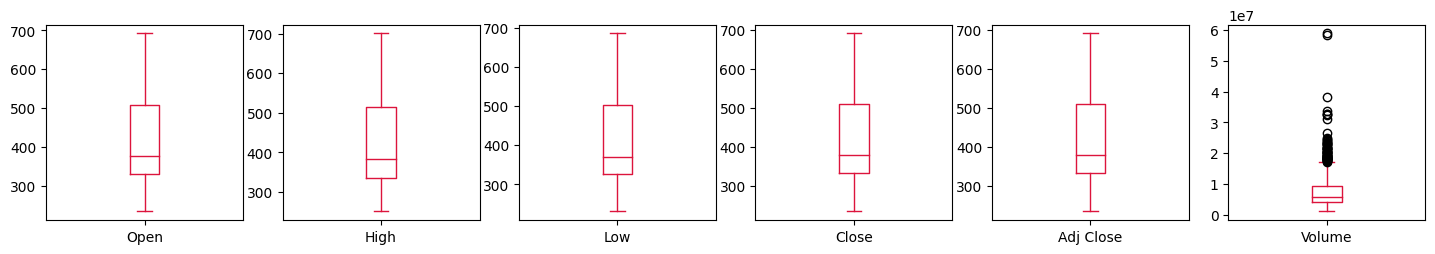

In [ ]:
df.plot(kind='box',subplots=True,layout=(10,10),figsize=(30,30),color='crimson')#Plotting box plot
plt.show()

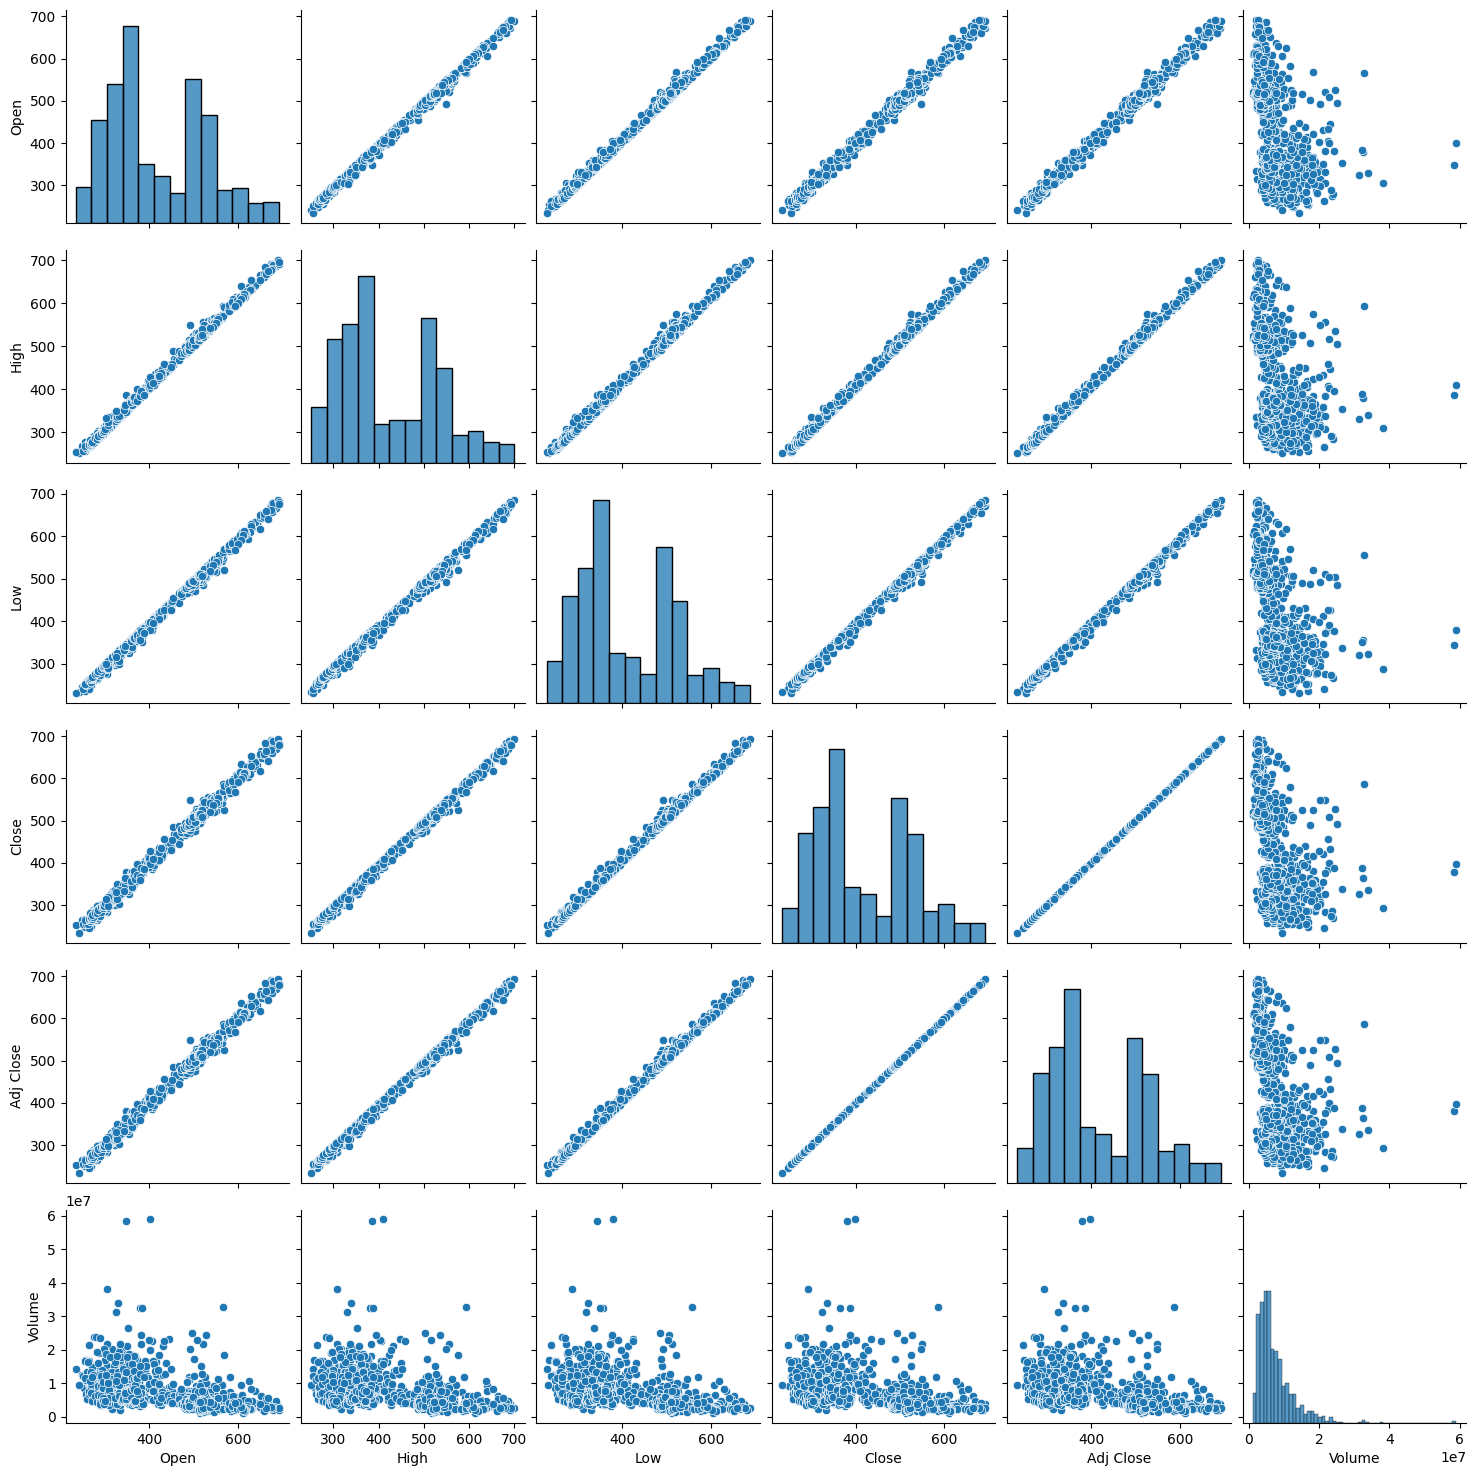

In [ ]:
sns.pairplot(df)#Plotting Pairplot

In [ ]:
train_data,test_data=train_test_split(stock_price,test_size=0.3,random_state=42)#Splitting the dataset into training dataset and testing dataset.
train_data.shape#Shape of training dataset

(706, 6)

In [ ]:
test_data.shape#Shape of testing dataset

(303, 6)

**Data Preprocessing**

In [ ]:
scaler=MinMaxScaler()#Selecting MinMaxScaler
#In MinMaxScaler each feature is scaled to a specific region generally between 0 and 1.

In [ ]:
scalerr=MinMaxScaler()

In [ ]:
trained_data_scaled=scaler.fit_transform(train_data)#Scaling the train data.
trained_data_scaled

array([[0.11838232, 0.08998671, 0.12175871, 0.11986502, 0.11986502,
        0.03598585],
       [0.55670445, 0.5414309 , 0.56070098, 0.55381987, 0.55381987,
        0.02337125],
       [0.11212183, 0.09767538, 0.11495845, 0.1300747 , 0.1300747 ,
        0.13207268],
       ...,
       [0.67691906, 0.66287127, 0.6698401 , 0.66183209, 0.66183209,
        0.02354505],
       [0.09626332, 0.07914141, 0.10282939, 0.10512013, 0.10512013,
        0.08482615],
       [0.33054124, 0.33309287, 0.3316983 , 0.35996755, 0.35996755,
        0.11774613]])

In [ ]:
test_data_scaled=scaler.fit_transform(test_data)
test_data_scaled

array([[0.56298816, 0.56873531, 0.57116378, 0.58773978, 0.58773978,
        0.12027515],
       [0.57851828, 0.56386931, 0.54377812, 0.55397542, 0.55397542,
        0.12842012],
       [0.58285755, 0.57792415, 0.57329148, 0.56785702, 0.56785702,
        0.08172998],
       ...,
       [0.01902435, 0.02428483, 0.0259214 , 0.03600624, 0.03600624,
        0.26479931],
       [0.25597223, 0.24483975, 0.23008991, 0.22702054, 0.22702054,
        0.15971753],
       [0.2633947 , 0.25291961, 0.24825552, 0.252859  , 0.252859  ,
        0.10014307]])

In [ ]:
#Creating a data structure with 50 timesteps and 1 output , where timestep is the memory size.
x_train=[]
y_train=[]
timesteps=50
#In the below function I am creating the train_data with 50x stock price and next one is 1 scrolled data.
for i in range(timesteps,len(trained_data_scaled)):
  x_train.append(trained_data_scaled[i-timesteps:i,0])
  y_train.append(trained_data_scaled[i,0])
x_train,y_train=np.array(x_train),np.array(y_train)


In [ ]:
real_stock_price=test_data.loc[:,['Open']].values

**Model : Using LSTM(Long Short Term Memory) Model**

Long Short-Term Memory (LSTM) is a type of recurrent neural network (RNN) architecture that is well-suited for sequence prediction and time series forecasting tasks. LSTMs are capable of capturing long-term dependencies in sequential data, making them popular for applications such as natural language processing, speech recognition, and financial time series analysis.



In [ ]:
#Creating LSTM model
model=Sequential()
model.add(LSTM(units=50 , return_sequences=True , input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))


In [ ]:
model.summary()#Summary method provides a concise and informative summary about the neural network model's architecture.

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 50, 50)            10400     
                                                                 
 dropout_7 (Dropout)         (None, 50, 50)            0         
                                                                 
 lstm_9 (LSTM)               (None, 50, 50)            20200     
                                                                 
 dropout_8 (Dropout)         (None, 50, 50)            0         
                                                                 
 lstm_10 (LSTM)              (None, 50, 50)            20200     
                                                                 
 dropout_9 (Dropout)         (None, 50, 50)            0         
                                                                 
 lstm_11 (LSTM)              (None, 50, 50)           

In [ ]:
model.compile(loss='mean_squared_error', optimizer ='Adam')#model.compile is used to compile a  neural network model in TensorFlow.

In [ ]:
model.fit(x_train,y_train,epochs=10,batch_size=32)

Epoch 1/10
21/21 [==============================] - 17s 151ms/step - loss: 0.0877
Epoch 2/10
21/21 [==============================] - 4s 173ms/step - loss: 0.0613
Epoch 3/10
21/21 [==============================] - 4s 182ms/step - loss: 0.0584
Epoch 4/10
21/21 [==============================] - 3s 151ms/step - loss: 0.0611
Epoch 5/10
21/21 [==============================] - 3s 152ms/step - loss: 0.0615
Epoch 6/10
21/21 [==============================] - 4s 206ms/step - loss: 0.0611
Epoch 7/10
21/21 [==============================] - 3s 151ms/step - loss: 0.0608
Epoch 8/10
21/21 [==============================] - 3s 151ms/step - loss: 0.0591
Epoch 9/10
21/21 [==============================] - 3s 151ms/step - loss: 0.0585
Epoch 10/10
21/21 [==============================] - 4s 211ms/step - loss: 0.0581


In [ ]:
total_dataset=pd.concat((train_data['Open'],test_data['Open']),axis=0)
input=total_dataset[len(total_dataset)-len(test_data)-timesteps:].values.reshape(-1,1)
input=scalerr.fit_transform(input)
input=scalerr.transform(input)

In [ ]:
#Prediction
X_test=[]
for i in range(timesteps,timesteps+len(test_data)):
    X_test.append(input[i-timesteps:i,0])
X_test=np.array(X_test)
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
predicted_stock_price=model.predict(X_test)
predicted_stock_price=scalerr.inverse_transform(predicted_stock_price)
#I have scaled between 0-1 data, inversing it.

10/10 [==============================] - 4s 55ms/step


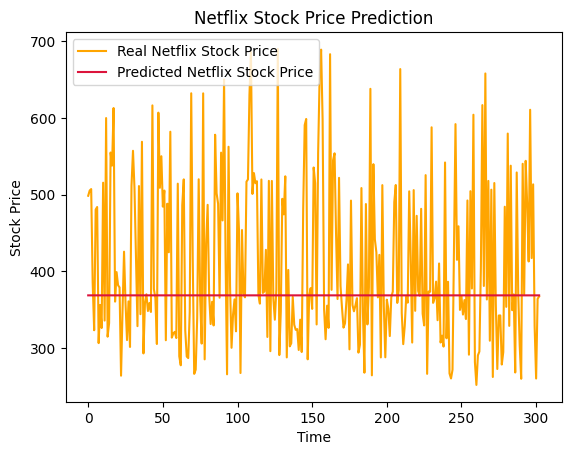

In [ ]:
#Visualising the Stock Price
plt.plot(real_stock_price,color="orange",label="Real Netflix Stock Price")
plt.plot(predicted_stock_price,color="crimson",label="Predicted Netflix Stock Price")
plt.title("Netflix Stock Price Prediction")
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.legend()
plt.show()